**Building model from scratch for Face Recognition**
  
  1. Data preprocessing to convert all train and test images into format as required by model.
  2. Tuning parameters and buidling the model that gives the best performance. 
  Report contains the details about hyper-parameter tuning and link to recordings made durig the process.

Dataset is saved in Google drive and is accessed through the following way 

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import zipfile, os
from google.colab import drive

zip_id ="1ZWRkAm4SM76RiQRJQfFwKa1NyWi5uEeJ"

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# DOWNLOAD ZIP
print ("Downloading zip file")
myzip = drive.CreateFile({'id': zip_id})
myzip.GetContentFile('Datasets.zip')

# UNZIP ZIP
print ("Uncompressing zip file")
zip_ref = zipfile.ZipFile('Datasets.zip', 'r')
zip_ref.extractall('Datasets/')
zip_ref.close()

Uncompressing zip file


Importing the required packages

In [0]:
import os
import numpy as np
import PIL
from PIL import Image
import keras as k
from matplotlib import pyplot as p
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, Dropout, Activation,Flatten,BatchNormalization
from keras.layers import Conv2D,ZeroPadding2D, MaxPooling2D

Function that prepares data as required by the model. This step is performed for both validation and training data

In [0]:

def load_images(path,num_classes):
    
    print('Loading ' + str(num_classes) + ' classes')

    X_train=np.zeros([num_classes*500,150,150,3],dtype='uint8')
    y_train=np.zeros([num_classes*500], dtype='uint8')

    trainPath=path+'/train'

    print('loading training images...');

    i=0
    j=0
    annotations={}
    for sChild in os.listdir(trainPath):
        sChildPath = os.path.join(os.path.join(trainPath,sChild),'images')
        annotations[sChild]=j
        for c in os.listdir(sChildPath):
            print(sChildPath)
            X=np.array(Image.open(os.path.join(sChildPath,c)))
            if len(np.shape(X))==2:
                X_train[i]=np.array([X,X,X])
            else:
                X_train[i]=X
            y_train[i]=j
            i+=1
        j+=1
        if (j >= num_classes):
            break

    print('finished loading training images')

    X_test=np.zeros([num_classes*100,150,150,3],dtype='uint8')
    y_test=np.zeros([num_classes*100], dtype='uint8')

    valPath=path+'/val'

    print('loading training images...');

    i=0
    j=0
    annotations={}
    for sChild in os.listdir(valPath):
        sChildPath = os.path.join(os.path.join(valPath,sChild),'images')
        annotations[sChild]=j
        for c in os.listdir(sChildPath):
            print(sChildPath)
            X=np.array(Image.open(os.path.join(sChildPath,c)))
            if len(np.shape(X))==2:
                X_test[i]=np.array([X,X,X])
            else:
                X_test[i]=X
            y_test[i]=j
            i+=1
        j+=1
        if (j >= num_classes):
            break

    print('finished loading training images')


    return X_train,y_train,X_test,y_test

Creation of  customized layer in keras


In [0]:
from keras import backend as K
def l1_reg(weight_matrix):
    return 0.01 * K.sum(K.abs(weight_matrix))

Model creation

In [0]:
def model_creation():
   model = Sequential()
   model.add(Conv2D(32, (3, 3), padding='same', input_shape= (150,150,3)))
   model.add(Activation('relu'))
   model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None))
   model.add(MaxPooling2D(pool_size=(2, 2)))
   model.add(Conv2D(32,(3, 3), padding='same'))
   model.add(Activation('relu'))
   model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None))
   model.add(MaxPooling2D(pool_size=(2, 2)))
   model.add(Flatten())
   model.add(Dense(2048))
   model.add(Dropout(0.5))
   model.add(Activation('relu'))
   model.add(Dense(512,kernel_regularizer=l1_reg))
   model.add(Dropout(0.5))
   model.add(Activation('relu'))
   model.add(Dense(no_class))
   model.add(Activation('softmax'))
   opt = optimizers.Adam(beta_1=.9,beta_2=.999,lr = learning_rate)
   model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
   return model

**Model performance**

In [0]:
def plot_modelacc(fit_model):
    with p.style.context('ggplot'):
            p.plot(fit_model.history['acc'])
            p.plot(fit_model.history['val_acc'])
            p.title("MODEL ACCURACY")
            p.xlabel("# of EPOCHS")
            p.ylabel("ACCURACY")
            p.legend(['train', 'test'], loc='upper left')
    return p.show()

def plot_model_loss(fit_model):
    with p.style.context('ggplot'):
            p.plot(fit_model.history['loss'])
            p.plot(fit_model.history['val_loss'])
            p.title("MODEL LOSS")
            p.xlabel("# of EPOCHS")
            p.ylabel("LOSS")
            p.legend(['train', 'test'], loc='upper left')
    return p.show()


In [0]:
    path='/content/Datasets/Datasets'
    X_train,y_train,X_test,y_test = load_images(path,33)
    no_class = 33 
    print(X_train.shape)
    print(X_test.shape)
    y_train = k.utils.to_categorical(y_train, no_class)
    y_test = k.utils.to_categorical(y_test, no_class)
    # pixel values range from 0 to 255 - normalize 
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    X_train  /= 255
    X_test /= 255

Loading 33 classes
loading training images...
/content/Datasets/Datasets/train/john/images
/content/Datasets/Datasets/train/john/images
/content/Datasets/Datasets/train/john/images
/content/Datasets/Datasets/train/john/images
/content/Datasets/Datasets/train/john/images
/content/Datasets/Datasets/train/john/images
/content/Datasets/Datasets/train/john/images
/content/Datasets/Datasets/train/john/images
/content/Datasets/Datasets/train/john/images
/content/Datasets/Datasets/train/john/images
/content/Datasets/Datasets/train/john/images
/content/Datasets/Datasets/train/john/images
/content/Datasets/Datasets/train/john/images
/content/Datasets/Datasets/train/john/images
/content/Datasets/Datasets/train/john/images
/content/Datasets/Datasets/train/john/images
/content/Datasets/Datasets/train/john/images
/content/Datasets/Datasets/train/john/images
/content/Datasets/Datasets/train/john/images
/content/Datasets/Datasets/train/john/images
/content/Datasets/Datasets/train/john/images
/content/

In [0]:
batch_size = 64
epoch = 70
learning_rate = 0.0001
model = model_creation()
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epoch,validation_data=(X_test,y_test),shuffle=True)

Train on 16500 samples, validate on 3300 samples
Epoch 1/70
16500/16500 [==============================] - 36s 2ms/step - loss: 162.6913 - acc: 0.8169 - val_loss: 92.2488 - val_acc: 0.0458
Epoch 2/70
16500/16500 [==============================] - 34s 2ms/step - loss: 48.4891 - acc: 0.8312 - val_loss: 27.6115 - val_acc: 0.7188
Epoch 3/70
16500/16500 [==============================] - 34s 2ms/step - loss: 17.4428 - acc: 0.8442 - val_loss: 11.2851 - val_acc: 0.7570
Epoch 4/70
16500/16500 [==============================] - 34s 2ms/step - loss: 7.5386 - acc: 0.8656 - val_loss: 5.3707 - val_acc: 0.7645
Epoch 5/70
16500/16500 [==============================] - 34s 2ms/step - loss: 3.4946 - acc: 0.8733 - val_loss: 2.7910 - val_acc: 0.7670
Epoch 6/70
16500/16500 [==============================] - 34s 2ms/step - loss: 1.8167 - acc: 0.8802 - val_loss: 1.7724 - val_acc: 0.7755
Epoch 7/70
16500/16500 [==============================] - 34s 2ms/step - loss: 1.1917 - acc: 0.8845 - val_loss: 1.4596 - v

In [0]:
acc = model.evaluate(X_test, y_test, verbose=1)
print('Test data loss:', acc[0] )
print('Test data accuracy:', acc[1] * 100)

3300/3300 [==============================] - 2s 492us/step
Test data loss: 1.3227816534764838
Test data accuracy: 83.87878787878788


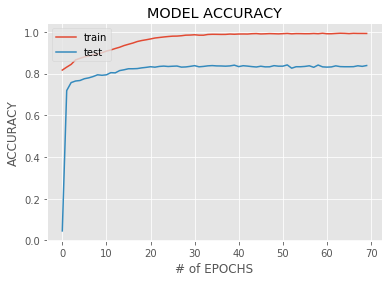

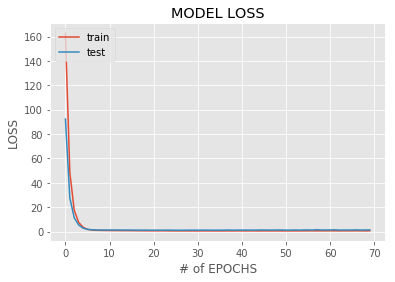

In [0]:
plot_modelacc(history)
plot_model_loss(history)

**Saving model weights and serialized model structure to disk for deployment in Raspberry Pi**

In [0]:
model.save('./model_weights.h5')
# serialize model structure to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
json_file.write(model_json)